In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as signal
import pywt
import wfdb

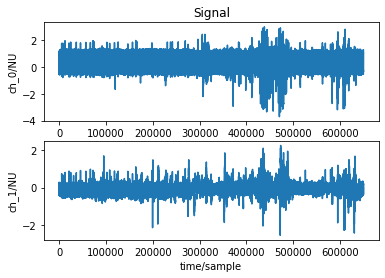

(array([[-0.445,  0.26 ],
        [-0.445,  0.26 ],
        [-0.445,  0.26 ],
        ...,
        [ 0.59 , -0.37 ],
        [ 0.76 , -0.38 ],
        [ 1.28 ,  0.   ]]),
 {'fs': 360,
  'sig_len': 650000,
  'n_sig': 2,
  'base_date': None,
  'base_time': None,
  'units': ['mV', 'mV'],
  'sig_name': ['MLII', 'V1'],
  'comments': ['73 F 1624 1629 x1',
   'Digoxin, Nitropaste, Pronestyl',
   'The PVCs are uniform.  The predominant feature of this tape is',
   'high-grade noise and artifact.']})

In [2]:
signals, fields = wfdb.rdsamp(r"C:\\Users\\aroy8\\OneDrive\\Desktop\\Mental Stress\\Final ECG\\mit-bih-arrhythmia-database-1.0.0\\mit-bih-arrhythmia-database-1.0.0\\105")
wfdb.plot_items(signal=signals, fs=fields['fs'], title='Signal')
display((signals, fields))

In [3]:
signals.astype

<function ndarray.astype>

## Wavelet Approach

In [4]:
wavelets = pywt.wavedec(signals[:, 1],"sym3",level=10)

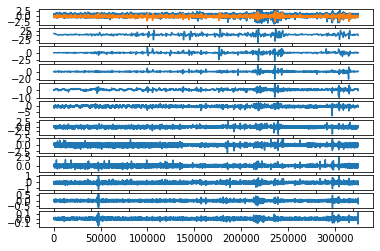

In [5]:
fig, ax = plt.subplots(len(wavelets)+1)
ax[0].plot(signals)

for i,wavelet in enumerate(wavelets):
    ax[i+1].plot(wavelet)

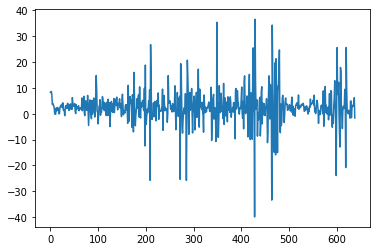

In [6]:
fig, ax = plt.subplots()
ax.plot(pywt.waverec(wavelets[0:1],'sym3'))

In [7]:
signal_lp = pywt.waverec(wavelets[0:1],'sym3')
print(signals.shape)
print(signals[:,0].shape)
print(signal_lp.shape)
print(signal_lp)

(650000, 2)
(650000,)
(639,)
[ 8.19290525e+00  8.15041449e+00  8.58674030e+00  7.23803227e+00
  3.59177498e+00  3.93417871e+00  3.17696914e+00  3.08918269e+00
  2.08832484e+00 -1.30038178e-01 -1.33287326e-01 -2.42022469e-01
  2.14280184e+00  1.00305631e+00  2.23790884e+00  2.39357193e+00
  1.38509361e+00  2.02811587e+00 -9.58507696e-02  6.00279498e-02
  2.55773876e+00  2.88251747e+00  2.70589980e+00  3.41545606e+00
  3.65507994e+00  2.34029167e+00  4.19416734e+00  1.32202654e+00
  1.21637617e+00  1.47508318e+00 -7.94604256e-01  2.24607847e+00
  3.01164944e+00  2.01475086e+00  3.15419690e+00  2.36545094e+00
  4.00369675e+00  1.97284681e+00  3.56877583e+00  1.26453940e+00
  3.13309211e+00  2.82856942e+00  3.77557770e+00  1.69836759e+00
  3.52971426e+00  1.65426783e+00  6.21337984e+00  4.22977457e+00
  3.28775076e+00  2.82211639e+00  3.41453613e+00  3.88939338e+00
  8.52747334e-01  2.69981418e-02  3.44933701e+00  1.62252413e+00
  2.48834337e+00  2.07609111e+00  2.63264251e+00  3.09584121e

In [8]:
coefs, frequencies = pywt.cwt(signal_lp, np.arange(1, 21), 'morl')
print(coefs.shape)
print(frequencies.shape)
print(coefs,frequencies)

(20, 639)
(20,)
[[-6.97620278e-04 -9.54485334e-01 -2.14927221e-01 ...  3.50841146e-01
  -1.02116609e+00 -1.33714293e-01]
 [ 1.60494456e-01  1.39300636e+00 -1.85913722e+00 ... -1.99276811e+00
   1.81504203e+00  7.24057124e-02]
 [-2.47754134e-01  1.89303822e+00  2.32522853e-01 ... -1.76252318e+00
   3.21969147e+00  6.62926304e-01]
 ...
 [ 6.31933882e+00  7.92884559e+00  8.64280727e+00 ...  1.17005547e+00
   1.96701356e+00  2.28740813e+00]
 [ 6.21548523e+00  7.45810827e+00  8.34129312e+00 ...  5.28141483e-01
   8.90394361e-01  1.22766927e+00]
 [ 6.21771162e+00  7.33175109e+00  7.67675339e+00 ...  1.41004277e+00
   1.65265867e+00  3.56168114e-01]] [0.8125     0.40625    0.27083333 0.203125   0.1625     0.13541667
 0.11607143 0.1015625  0.09027778 0.08125    0.07386364 0.06770833
 0.0625     0.05803571 0.05416667 0.05078125 0.04779412 0.04513889
 0.04276316 0.040625  ]


## Feature Extractor function

In [9]:
def features_extractor(file):
    signals, fields = wfdb.rdsamp(file)
    wavelets = pywt.wavedec(signals[:, 0],"sym3",level=3)
    signal_lp = pywt.waverec(wavelets[0:1],'sym3')
    coefs, frequencies = pywt.cwt(signal_lp, np.arange(1, 21), 'morl')
    
    return coefs, frequencies

In [10]:
from ecgdetectors import Detectors
detectors = Detectors(360)
r_peaks = detectors.pan_tompkins_detector(signals[:,1])
#r_peaks = detectors.pan_tompkins_detector(signal_lp)
print(r_peaks)

[114, 231, 454, 724, 961, 1217, 1494, 1737, 2010, 2301, 2547, 2818, 3048, 3299, 3560, 3851, 4097, 4406, 4632, 4896, 5170, 5423, 5582, 5961, 6213, 6464, 6733, 6992, 7242, 7502, 7802, 7961, 8286, 8579, 8846, 9109, 9345, 9616, 9874, 10100, 10376, 10660, 10903, 11184, 11420, 11671, 11926, 12203, 12445, 12649, 12983, 13248, 13502, 13750, 14021, 14249, 14512, 14823, 15049, 15308, 15570, 15830, 16080, 16331, 16605, 16868, 17141, 17394, 17675, 17911, 18183, 18442, 18678, 18942, 19208, 19479, 19742, 20003, 20257, 20510, 20760, 21026, 21223, 21571, 21855, 22095, 22315, 22597, 22854, 23130, 23371, 23636, 23931, 24193, 24424, 24672, 24871, 25187, 25457, 25746, 25992, 26268, 26511, 26766, 27015, 27287, 27544, 27790, 28078, 28330, 28585, 28831, 29103, 29344, 29600, 29865, 30132, 30397, 30657, 30912, 31029, 31161, 31412, 31664, 31948, 32202, 32472, 32731, 33020, 33229, 33486, 33745, 34006, 34269, 34558, 34814, 35071, 35317, 35586, 35826, 36108, 36361, 36649, 36832, 37147, 37447, 37661, 37911, 38162, 

In [11]:
len(r_peaks)

2694

## RR Distance Function

In [12]:
def rr_distance(signals):
    from ecgdetectors import Detectors
    detectors = Detectors(360)
    r_peaks = detectors.pan_tompkins_detector(signals)
    peaks = np.array(r_peaks)
    avg = []
    for i in range(0,len(r_peaks)-1):

        dist = peaks[i]-peaks[i+1]
        avg.append(dist)
    return (-np.average(avg)),r_peaks

print(rr_distance(signal_lp))

(123.25, [110, 219, 333, 442, 603])


In [13]:
signals[436009][1]

1.66

In [14]:
def amplitude(r_peaks):
    amp_arr = []
    for i in r_peaks:
       amp_arr.append(signals[i][1]) 
    return max(amp_arr)

In [16]:
amplitude(r_peaks)

1.66

In [17]:
def amplitude(r_peaks):   
    ind=0
    maxi=signals[0][1]
    for i in r_peaks:
        if(signals[i][1]>maxi):
            ind=i
            maxi=signals[i][1]


    return maxi,ind

In [18]:
amplitude(r_peaks)

(1.66, 436009)

## Denoising

In [19]:
def denoising(y, threshold, sample_rate):
    n = len(y)
    fhat = np.fft.fft(y, n) #computes the fft
    psd = fhat * np.conj(fhat)/n
    freq = (1/(sample_rate*n)) * np.arange(n) #frequency array
    idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)
    psd_idxs = psd > threshold #array of 0 and 1
    psd_clean = psd * psd_idxs #zero out all the unnecessary powers
    fhat_clean = psd_idxs * fhat #used to retrieve the signal

    signal_filtered = np.fft.ifft(fhat_clean) #inverse fourier transform
    
    return signal_filtered

C:\Python\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


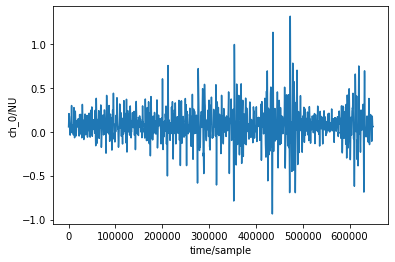

In [44]:
denoised  = denoising(signals[:, 1],50,360)
fig1 = wfdb.plot_items(signal=denoised,return_fig=True)


fig1.savefig('denoised.png', dpi=100)

In [21]:
RR = rr_distance(denoised)
print(RR)
Amplitude = amplitude(RR[1])
print(Amplitude)

C:\Python\lib\site-packages\numpy\core\fromnumeric.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  return bound(*args, **kwds)


(149.8883506343714, [117, 273, 401, 531, 663, 790, 922, 1052, 1179, 1312, 1441, 1570, 1702, 1829, 1961, 2090, 2220, 2351, 2478, 2611, 2738, 2869, 3001, 3127, 3260, 3390, 3517, 3650, 3779, 3906, 4040, 4168, 4296, 4430, 4557, 4687, 4819, 4946, 5077, 5208, 5336, 5467, 5597, 5726, 5856, 5987, 6116, 6246, 6376, 6506, 6634, 6766, 6896, 7024, 7157, 7284, 7415, 7546, 7673, 7806, 7933, 8065, 8194, 8323, 8455, 8582, 8715, 8844, 8971, 9105, 9232, 9362, 9495, 9621, 9753, 9884, 10011, 10143, 10272, 10401, 10532, 10662, 10791, 10921, 11053, 11180, 11311, 11442, 11569, 11701, 11831, 11959, 12091, 12220, 12349, 12481, 12609, 12740, 12869, 12999, 13130, 13258, 13390, 13518, 13648, 13780, 13907, 14038, 14169, 14297, 14428, 14559, 14686, 14818, 14948, 15076, 15208, 15337, 15466, 15597, 15727, 15855, 15987, 16116, 16245, 16377, 16506, 16634, 16766, 16895, 17024, 17156, 17285, 17414, 17546, 17674, 17803, 17936, 18062, 18194, 18325, 18452, 18585, 18713, 18843, 18974, 19101, 19235, 19362, 19493, 19625, 19750